**import libraries**

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import class_weight, shuffle
from sklearn.model_selection import train_test_split
import shutil
import cv2
import tensorflow as tf
import seaborn as sns
%matplotlib inline
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

**declare variables**

In [2]:
img_size = 224
seed = 42
num_samp = 7

**import libraries**

In [3]:
new_label_data = pd.read_csv('new_label.csv')

In [4]:
eye_label = new_label_data['diagnosis'].unique()
eye_label

array([1, 2, 0], dtype=int64)

**original images display 5 images from each category**

F:\diabetic_reitinopathy_image/train_images/ef5155990874.png  =  0
F:\diabetic_reitinopathy_image/train_images/0a85a1e8f9e9.png  =  0
F:\diabetic_reitinopathy_image/train_images/6a2642131e4a.png  =  0
F:\diabetic_reitinopathy_image/train_images/8a8a251770cd.png  =  0
F:\diabetic_reitinopathy_image/train_images/ac1667fac512.png  =  0
F:\diabetic_reitinopathy_image/train_images/4c129470cec4.png  =  1
F:\diabetic_reitinopathy_image/train_images/c6a2975228af.png  =  1
F:\diabetic_reitinopathy_image/train_images/77e7c7a160c8.png  =  1
F:\diabetic_reitinopathy_image/train_images/6377e23928f6.png  =  1
F:\diabetic_reitinopathy_image/train_images/1594ca6c30d3.png  =  1
F:\diabetic_reitinopathy_image/train_images/d2901144070c_flip.png  =  2
F:\diabetic_reitinopathy_image/train_images/6089fa333013.png  =  2
F:\diabetic_reitinopathy_image/train_images/8bed09514c3b.png  =  2
F:\diabetic_reitinopathy_image/train_images/0f882877bf13_flip.png  =  2
F:\diabetic_reitinopathy_image/train_images/84c663f3

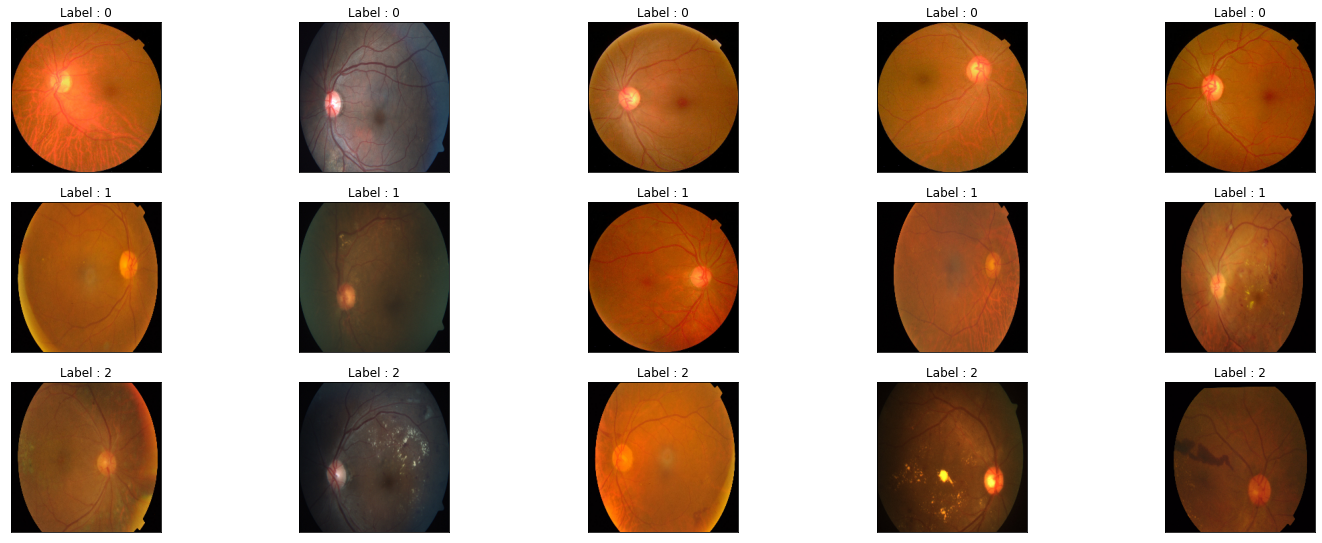

In [5]:
%%time
fig = plt.figure(figsize=(25, 16))

for class_id in sorted(eye_label):
    for i, (idx, row) in enumerate(new_label_data.loc[new_label_data['diagnosis'] == class_id].sample(5, random_state=seed).iterrows()):
        ax = fig.add_subplot(5, 5, class_id * 5 + i + 1, xticks=[], yticks=[])
        path = os.path.join(f"F:\diabetic_reitinopathy_image/train_images/{row['id_code']}.png")
        print(path, " = ", class_id)
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (img_size, img_size))
        plt.imshow(image)
        ax.set_title('Label : %d' % (class_id) )

**images after applying image process**

In [33]:
def load_ben_color(path, sigmaX=10):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (img_size, img_size))
    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
    return image

Wall time: 3.72 s


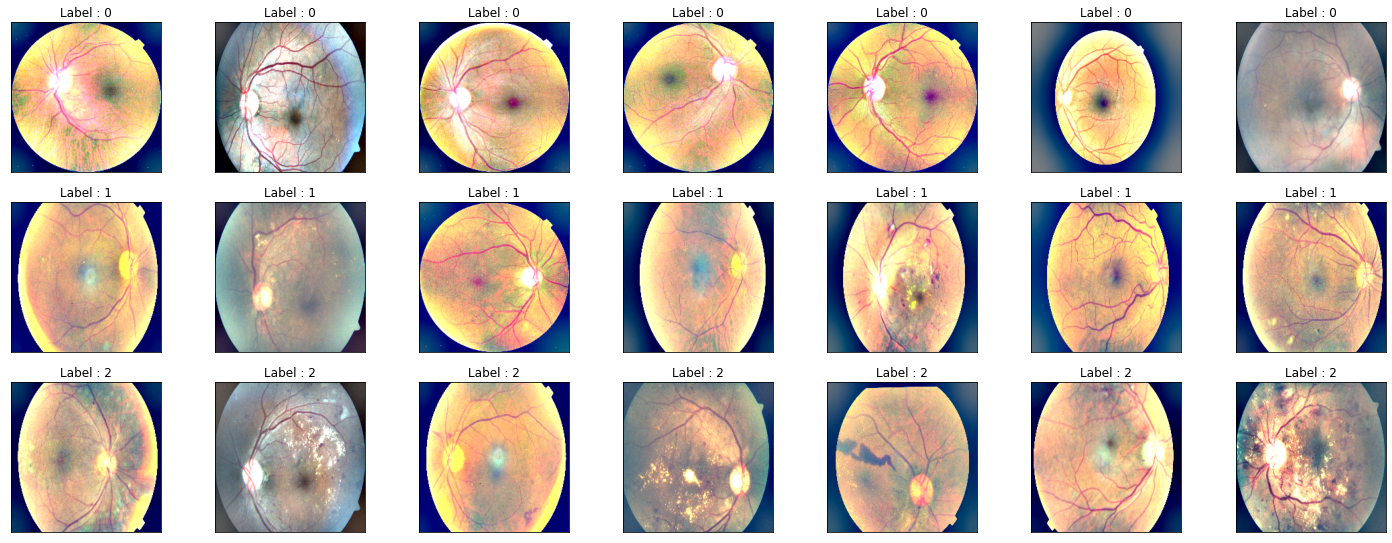

In [34]:
%%time
fig = plt.figure(figsize=(25, 16))

for class_id in sorted(eye_label):
    for i, (idx, row) in enumerate(new_label_data.loc[new_label_data['diagnosis'] == class_id].sample(num_samp, random_state=seed).iterrows()):
        ax = fig.add_subplot(5, NUM_SAMP, class_id * NUM_SAMP + i + 1, xticks=[], yticks=[])
        path = os.path.join(f"F:\diabetic_reitinopathy_image/train_images/{row['id_code']}.png")
        image = load_ben_color(path,sigmaX=30)

        plt.imshow(image)
        ax.set_title('Label : %d' % (class_id) )